# day 177,day 179,day 181,day 183

# Transfer Learning:

# philosophy of TL:

* use something that is already working to reach your goal rather than building everything from scratch. Don't reinvent the wheel. if a model with a highest accuracy which had been proven to work very well and had been trained on a large and diverse dataset then use it in your problem rather than collecting all the data to build the model yourself

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime

In [ ]:
# download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


# unzip the data
zip = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip.extractall()
zip.close()

--2023-09-20 12:21:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 173.194.216.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   199MB/s    in 0.8s    

2023-09-20 12:21:17 (199 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# look at all different file types in training directory!

list(os.listdir('10_food_classes_10_percent/train'))

['chicken_wings',
 'sushi',
 'chicken_curry',
 'ramen',
 'hamburger',
 'pizza',
 'ice_cream',
 'grilled_salmon',
 'fried_rice',
 'steak']

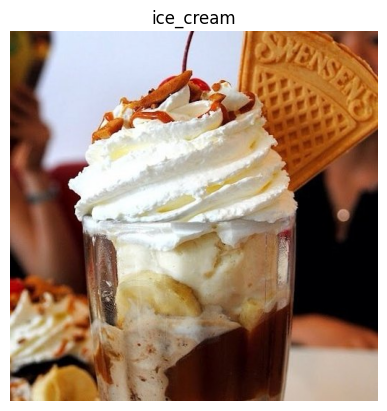

In [ ]:
# visualize a random image

def show_image(file_name,dir):

    random_class = np.random.choice(list(os.listdir(file_name + '/' + dir)))

    random_image = np.random.choice(list(os.listdir(file_name + '/' + dir + '/' + random_class)))

    full_path = file_name + '/' + dir + '/' + random_class + '/' + random_image

    image_in_numbers = image.imread(full_path)


    # show it
    plt.imshow(image_in_numbers)

    plt.title(random_class)

    plt.axis('off')


    plt.show()
    show_image('10_food_classes_10_percent','train')

In [ ]:
# preprocessing the data

train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_10_percent = train_datagen.flow_from_directory(directory=train_dir,
                                                          batch_size=32,
                                                          target_size=(224,224),
                                                          class_mode='sparse',
                                                          seed=42)


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                                        batch_size=32,
                                                        target_size=(224,224),
                                                        class_mode='sparse',
                                                        seed=42)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# introducing callbacks to our data

# there are 3 types of call-backs:

1. TensorBoard Callback - tracks every single computation that takes place on the tensorflow and visualizes it.

2. ModelCheckpoint callback - creates checkpoints on the model.

3. EarlyStopping callback - stops the model before it trains too much and overfits on the training data.

4. LearningRateScheduler - tracks learning rate.


# method to initialize the callback:

* **tf.keras.callbacks.callback**



In [ ]:
import datetime

datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

'20230920-122308'

In [ ]:


print(datetime.datetime.now())


# conclusion:
'''it shows TIME but the zone is wrong:it is not the right TIME for India.'''

2023-09-20 12:28:06.960734


'it shows TIME but the zone is wrong:it is not the right TIME for India.'

In [ ]:
# to get the time for my zone;India

import pytz
datetime.datetime.now(pytz.timezone('Asia/Calcutta')).strftime('%y%m%d-%H%M%S')

'230920-181927'

In [ ]:
# creating a TensorBoard call_back

import datetime,pytz


def TBC(dir_name,experiment_name):
    log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now(pytz.timezone('Asia/Calcutta')).strftime('%y%m%d-%H%M%S')

    TensorBoard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

    print(f'saving TensorBoard log files to : {log_dir}')
    return TensorBoard_callback

    # comment:
    '''Don't worry dir_name and experiment_name are of our choice'''

"Don't worry dir_name and experiment_name are of our choice"


# TensorFlow Hub:

 * Tensorflow Hub is repository of trained machine learning models.

 * [tfhub.dev](https://)



# which is better efficientnet or resnet

# difference between efficient net and resnet

* resnet deals with vanishing gradient problem by skipping intermediate networks/pathways. this gives the image classification model its highest accuracy!

* but efficient net does the same thing and more +

|Features            | Efficient Net       | Resnet         |
|--------------------|---------------------|----------------|
|Number of parameters|1.4-660 Million      |11-600Million   |
|Image Resolution    |224X224 and 260X260  |224X224         |
|Top-1 accuracy ImageNet| 84.4-91.3%       |78.1-82.7%      |
|Top-5 accuracy ImageNet|97.1-99.2%        |93.5%-96.4%     |

# compare resnet and efficient net

# their urls:
resnet: https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5

efficient-net:https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1


In [ ]:
# their urls:
res_net_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

efficient_net_url = "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"




In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

def create_model(model_url,num_classes=10):

    '''taking the pre-trained model from tensorflow hub and using it to classify images for our own problem
    model_url: url of the model
    num_classes: number of image classes in our problem
    trainable=False: which means we freeze the already learned patterns of the model we are using from tensorflow hub
    and using its parameters to understand the patterns in our problem only'''

    feature_extraction_layer = hub.KerasLayer(model_url,
                                            trainable=False,
                                            input_shape=(224,224,3),
                                            name='feature_extraction_layer')


    # building the model
    model = tf.keras.Sequential()
    model.add(feature_extraction_layer)
    model.add(tf.keras.layers.Dense(num_classes,activation='softmax',name='output_layer'))


    return model

# testing with the resnet model

In [ ]:
train_data_10_percent.num_classes

10

In [ ]:
res_net_model = create_model(res_net_url,train_data_10_percent.num_classes)


# compiling and fitting the model to see how it performs
res_net_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])


# fitting the model with call-backs
res_net_history = res_net_model.fit(train_data_10_percent,
                                    epochs=5,
                                    steps_per_epoch=len(train_data_10_percent),
                                    validation_data=test_data,
                                    validation_steps=len(test_data),
                                    callbacks=[TBC(dir_name='Tensorflow_hub',experiment_name='resnet_model1')])

saving TensorBoard log files to : Tensorflow_hub/resnet_model1/230920-182619
Epoch 1/5
24/24 [==============================] - 28s 591ms/step - loss: 2.0444 - accuracy: 0.3133 - val_loss: 1.2122 - val_accuracy: 0.6176
Epoch 2/5
24/24 [==============================] - 12s 503ms/step - loss: 0.9417 - accuracy: 0.7147 - val_loss: 0.8702 - val_accuracy: 0.7236
Epoch 3/5
24/24 [==============================] - 11s 488ms/step - loss: 0.6353 - accuracy: 0.8307 - val_loss: 0.7600 - val_accuracy: 0.7528
Epoch 4/5
24/24 [==============================] - 12s 493ms/step - loss: 0.4896 - accuracy: 0.8800 - val_loss: 0.7028 - val_accuracy: 0.7736
Epoch 5/5
24/24 [==============================] - 12s 504ms/step - loss: 0.3970 - accuracy: 0.9093 - val_loss: 0.6641 - val_accuracy: 0.7872


In [ ]:
# summary of the model
res_net_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


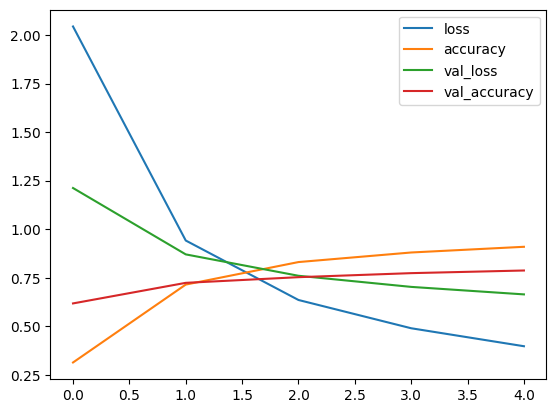

In [ ]:
# loss curves for the model
import pandas as pd
pd.DataFrame(res_net_history.history).plot();

In [ ]:
res_net_history.history

{'loss': [1.8144474029541016,
  0.8757839202880859,
  0.6044933795928955,
  0.4571606516838074,
  0.3645626902580261],
 'accuracy': [0.4013333320617676,
  0.734666645526886,
  0.8293333053588867,
  0.8840000033378601,
  0.9173333048820496],
 'val_loss': [1.1397637128829956,
  0.8552608489990234,
  0.741523027420044,
  0.6923518776893616,
  0.6664466261863708],
 'val_accuracy': [0.6507999897003174,
  0.72079998254776,
  0.7572000026702881,
  0.7716000080108643,
  0.7752000093460083]}

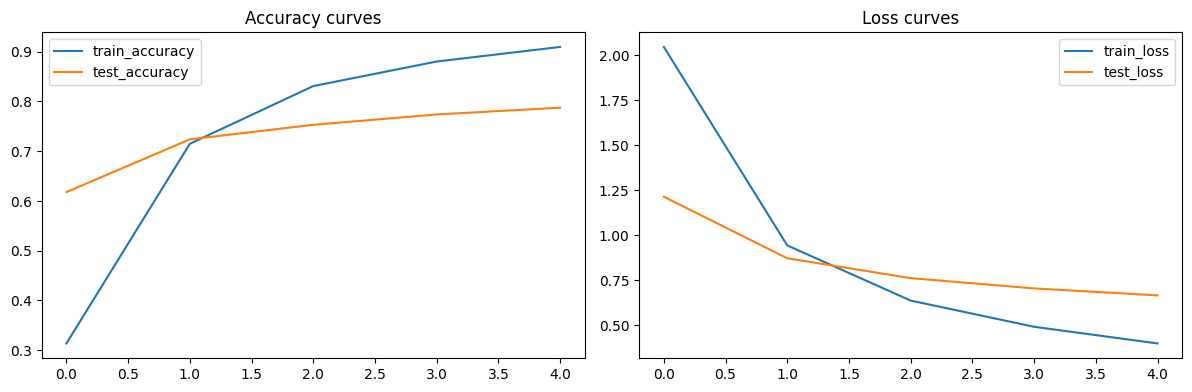

In [ ]:
def accuracy_loss_curves(history):

    fig,ax = plt.subplots(1,2,figsize=(12,4))

    ax[0].plot(history['accuracy'],label='train_accuracy')
    ax[0].plot(history['val_accuracy'],label='test_accuracy')
    ax[0].set_title('Accuracy curves')
    ax[0].legend()


    ax[1].plot(history['loss'],label='train_loss')
    ax[1].plot(history['val_loss'],label='test_loss')
    ax[1].set_title('Loss curves')
    ax[1].legend()


    plt.tight_layout(pad=1)


    plt.show()

    accuracy_loss_curves(res_net_history.history)

# efficient_net vs res_net

In [ ]:
# create the model for efficient net.

efficient_net_model = create_model(efficient_net_url,train_data_10_percent.num_classes)

# compilation
efficient_net_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=['accuracy'])

# fit the model
efficient_net_history = efficient_net_model.fit(train_data_10_percent,
                                                epochs=5,
                                                steps_per_epoch=len(train_data_10_percent),
                                                validation_data=test_data,
                                                validation_steps=len(test_data),
                                                callbacks=[TBC(dir_name='Tensorflow_hub',
                                                               experiment_name='efficient_net_b7')])


saving TensorBoard log files to : Tensorflow_hub/efficient_net_b7/230920-182910
Epoch 1/5
24/24 [==============================] - 81s 2s/step - loss: 1.5759 - accuracy: 0.5853 - val_loss: 0.9584 - val_accuracy: 0.8060
Epoch 2/5
24/24 [==============================] - 34s 1s/step - loss: 0.7857 - accuracy: 0.8280 - val_loss: 0.6671 - val_accuracy: 0.8340
Epoch 3/5
24/24 [==============================] - 35s 1s/step - loss: 0.5815 - accuracy: 0.8680 - val_loss: 0.5699 - val_accuracy: 0.8472
Epoch 4/5
24/24 [==============================] - 35s 1s/step - loss: 0.4803 - accuracy: 0.8920 - val_loss: 0.5243 - val_accuracy: 0.8512
Epoch 5/5
24/24 [==============================] - 35s 2s/step - loss: 0.4098 - accuracy: 0.9147 - val_loss: 0.4974 - val_accuracy: 0.8540


# conclusion:

* efficient_net_model has about the same training_accuracy as res_net model but the test results but it could generalize well on unseen data.

In [ ]:
efficient_net_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2560)              64097680  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                25610     
                                                                 
Total params: 64123290 (244.61 MB)
Trainable params: 25610 (100.04 KB)
Non-trainable params: 64097680 (244.51 MB)
_________________________________________________________________


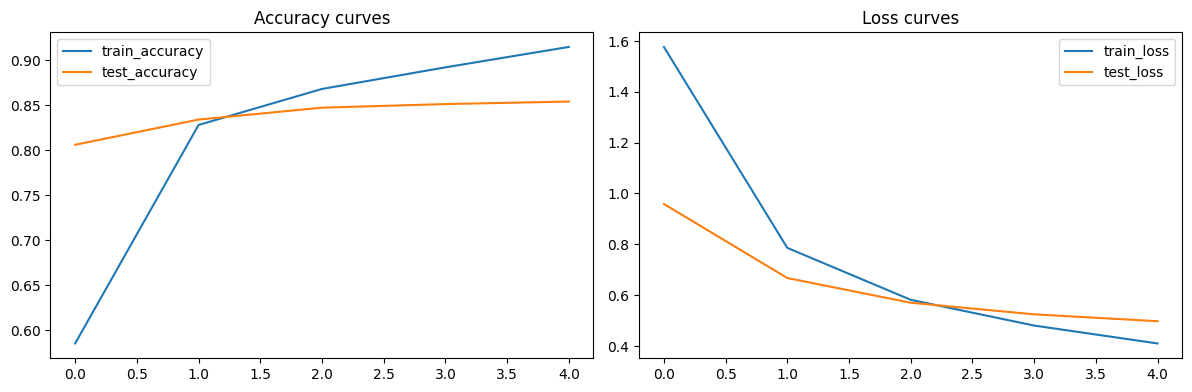

In [ ]:
accuracy_loss_curves(history=efficient_net_history.history)

In [ ]:
# how many layers does our efficient-net model have?



# different types of transfer learning:

#  As is transfer learning:
* use the model (like resnet or efficient net) which would be available tensorflowhub which was trained by imagenet and use it to solve your problem without changing anything about it.

# feature-extracted transfer learning:
* it is what we did above. use the pretrained model available in tensorflow hub to solve your own problem the only difference is the number of classes to classify is going to be problem specific that we are going to tweak every now and then.

# fine-tuned transfer learning:
* use a pretrained model to solve your problem but now you are fine-tuning or changing many of its layers and their parameters until they yield most optimal solution.
* this we may not keep the trainable = False, instead we might set trainable = True.


# compare our models using TensorBoard


# caveat of using TensorBoard:
* your results will be made public.

In [ ]:
!tensorboard dev upload --logdir ./Tensorflow_hub/ \
--name "resnet_model1 vs. efficient_net_b7" \
--description "comparing the performance of resnetv250 model with efficient_net_b7 model" \
--one_shot

2023-09-20 13:16:14.285896: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./Tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   RKMQ-DXRX



New experiment created. View your TensorBoard at: https://tensorboard.dev/expe

# explanation,analysis and freethrows:

# thing to remember to access tensorboard:
* !tensorboard dev upload --logdir ./directory_name where the files are stored/ \
* --name "you can give anything you want" \
* --description "again you can say anything you want" \
* --one_shot

In [ ]:
# to see what you have uploaded to tensorboardhub

!tensorboard dev list

2023-09-20 13:44:22.249873: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/ew1VkbNdTKWaYr268DjHAw/
	Name                 resnet_model1 vs. efficient_net_b7
	Description          comparing the performance of resnetv250 model with efficient_net_b7 model
	Id                   ew1VkbNdTKWaYr268DjHAw
	Created              2023-09-20 13:19:22 (25 minutes ago)
	Updated              2023-09-20 13:19:26 (24 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  1872192
Total: 1 experiment(s)


In [ ]:
# to delete the experiment from tensorboard


!tensorboard dev delete --experiment_id ew1VkbNdTKWaYr268DjHAw

2023-09-20 13:52:35.413318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Deleted experiment ew1VkbNdTKWaYr268DjHAw.


In [ ]:
!tensorboard dev list

2023-09-20 13:52:54.221742: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No experiments. Use `tensorboard dev upload` to get started.
